In [3]:
from rdkit import DistanceGeometry
import rdkit.Chem as Chem
from rdkit.Chem import Mol
from rdkit.Chem import rdDistGeom

In [4]:
base_folder = r'spare_data/'

train_r_file = base_folder + 'train_reactants.sdf'
train_ts_file = base_folder + 'train_ts.sdf'
train_p_file = base_folder + 'train_products.sdf'

test_r_file = base_folder + 'test_reactants.sdf'
test_ts_file = base_folder + 'test_ts.sdf'
test_p_file = base_folder + 'test_products.sdf'

train_r = Chem.ForwardSDMolSupplier(train_r_file, removeHs=False, sanitize=False)
train_r = [x for x in train_r]
train_ts = Chem.ForwardSDMolSupplier(train_ts_file, removeHs=False, sanitize=False)
train_ts = [x for x in train_ts]
train_p = Chem.ForwardSDMolSupplier(train_p_file, removeHs=False, sanitize=False)
train_p = [x for x in train_p]

test_r = Chem.ForwardSDMolSupplier(test_r_file, removeHs=False, sanitize=False)
test_r = [x for x in test_r]
test_ts = Chem.ForwardSDMolSupplier(test_ts_file, removeHs=False, sanitize=False)
test_ts = [x for x in test_ts]
test_p = Chem.ForwardSDMolSupplier(test_p_file, removeHs=False, sanitize=False)
test_p = [x for x in test_p]

In [18]:
train_rxns = list(zip(train_r, train_ts, train_p))
test_rxns  = list(zip(test_r, test_ts, test_p))

In [17]:
from rdkit.Chem import GetDistanceMatrix, Get3DDistanceMatrix

# find average topological dstance matrix
def get_avg_topological_dist(reactant, product):
    MAX_D = 10. # should bring this out later
    avg = (GetDistanceMatrix(reactant) + GetDistanceMatrix(product)) / 2
    avg[avg > MAX_D] = MAX_D
    return avg

def get_avg_topological_dist(reactant, product):
    avg = (Get3DDistanceMatrix(reactant) + Get3DDistanceMatrix(product)) / 2
    return avg

def ts_deviation_from_avg_topo(rxn):
    avg_topo = get_avg_topological_dist(rxn[0], rxn[2])
    ts_topo = GetDistanceMatrix(rxn[1])

def topological_distance_metric(t_mat_1, t_mat_2):
    



In [38]:
l = GetDistanceMatrix(train_rxn[0][0])
l

array([[0.e+00, 1.e+08, 1.e+08, 1.e+08, 1.e+08, 1.e+08, 1.e+08, 1.e+00,
        1.e+00, 1.e+00, 1.e+08, 1.e+08, 1.e+08, 1.e+08, 1.e+08],
       [1.e+08, 0.e+00, 1.e+00, 2.e+00, 2.e+00, 3.e+00, 4.e+00, 1.e+08,
        1.e+08, 1.e+08, 1.e+00, 1.e+00, 5.e+00, 5.e+00, 5.e+00],
       [1.e+08, 1.e+00, 0.e+00, 1.e+00, 1.e+00, 2.e+00, 3.e+00, 1.e+08,
        1.e+08, 1.e+08, 2.e+00, 2.e+00, 4.e+00, 4.e+00, 4.e+00],
       [1.e+08, 2.e+00, 1.e+00, 0.e+00, 2.e+00, 3.e+00, 4.e+00, 1.e+08,
        1.e+08, 1.e+08, 3.e+00, 3.e+00, 5.e+00, 5.e+00, 5.e+00],
       [1.e+08, 2.e+00, 1.e+00, 2.e+00, 0.e+00, 1.e+00, 2.e+00, 1.e+08,
        1.e+08, 1.e+08, 3.e+00, 3.e+00, 3.e+00, 3.e+00, 3.e+00],
       [1.e+08, 3.e+00, 2.e+00, 3.e+00, 1.e+00, 0.e+00, 1.e+00, 1.e+08,
        1.e+08, 1.e+08, 4.e+00, 4.e+00, 2.e+00, 2.e+00, 2.e+00],
       [1.e+08, 4.e+00, 3.e+00, 4.e+00, 2.e+00, 1.e+00, 0.e+00, 1.e+08,
        1.e+08, 1.e+08, 5.e+00, 5.e+00, 1.e+00, 1.e+00, 1.e+00],
       [1.e+00, 1.e+08, 1.e+08, 1.e+08, 1

In [ ]:
train

In [22]:
avg_topo = get_avg_topological_dist(train_rxn[0][0], train_rxn[0][2])
ts_topo = GetDistanceMatrix(train_rxn[0][1])

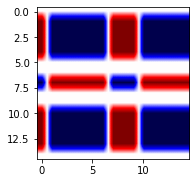

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

MAX = 25
a = l
a += a[::-1, :]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear', cmap=cm.seismic)
# ax1.imshow(a, interpolation='nearest', cmap=cm.Greys_r)

### RDKit Functions
- GetNumAtoms() and GetNumHeavyAtoms(): size of mol approximated by #atoms in it
- 




In [57]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1

from pandas import DataFrame

test = DataFrame(train_r)
test['num_atoms'] = [mol.GetNumAtoms() for mol in train_r]
test['num_heavy_atoms'] = [mol.GetNumHeavyAtoms() for mol in train_r]

# test['mol'] = [Chem.AddHs(mol) for mol in train_r]
# test['num_atoms'] = train_r.apply(lambda x: x.GetNumAtoms())
# test['num_heavy_atoms'] = train_r.apply(lambda x: x.GetNumHeavyAtoms())

In [58]:
test

,0,num_atoms,num_heavy_atoms
0,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,15,7
1,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,13,6
2,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,10,5
3,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,9,6
4,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,11,6
...,...,...,...
6734,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,14,7
6735,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,12,7
6736,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,10,7
6737,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,13,6


C:\Users\Avish\miniconda3\envs\3d-rdkit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


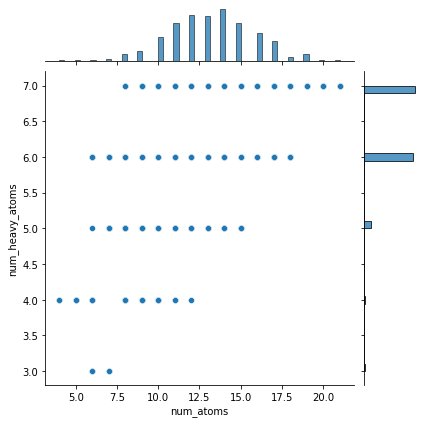

In [60]:
import seaborn as sns
sns.jointplot(test.num_atoms, test.num_heavy_atoms)
plt.show()

In [65]:
train_r[0].GetAtoms()

In [ ]:
# EDA

# GetBondLength(atom i, atom j)  in Å
# GetAngleDegree() and GetAngleRad() to get the bond angle between bonded atoms i, j and k
# GetDihedralDegree() and GetDihedralRad() to get the dihedral angle between bonded atoms i, j, k and l

# topological distances
MAX_D = 10
D
